In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5608179,Queensberry,DUDLEY STREET,KING STREET,WILLIAM STREET,4,7101S,12/03/2012 07:10:30 PM,12/03/2012 07:11:54 PM,84,3P TKT A M-SAT 7:30-20:30,0,614,2739
151998,Spencer,SPENCER STREET,BOURKE STREET,Lt COLLINS STREET,2,1536E,05/10/2011 08:08:04 PM,05/10/2011 08:30:00 PM,1316,2P MTR M-F 18:00-2030,0,1285,764
2002710,The Mac,SWANSTON STREET,FRANKLIN STREET,LA TROBE STREET,5,4621W,25/11/2011 10:44:20 AM,25/11/2011 10:45:46 AM,86,1P MTR M-F 9:30-16:00,0,1329,3550
4391539,Victoria Market,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6644,05/02/2012 09:45:00 AM,05/02/2012 10:11:31 AM,1591,2P SUN 7:30-18:30,0,681,2899
5213472,Titles,QUEEN STREET,LA TROBE STREET,Lt LONSDALE STREET,1,C1266,29/02/2012 05:45:26 PM,29/02/2012 05:47:44 PM,138,1P MTR M-SAT 7:30-19:30,0,1171,736


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
8585511,Titles,WILLIAM STREET,FRANKLIN STREET,A'BECKETT STREET,5,5345W,13/06/2012 05:42:05 PM,13/06/2012 06:19:26 PM,2241,3P TKT A M-SAT 7:30-20:30,0,1428,5047
6800601,Southbank,DODDS STREET,SOUTHBANK BOULEVARD,GRANT STREET,2,8338E,19/04/2012 10:01:37 AM,19/04/2012 10:02:59 AM,82,3P TKT A M-F 7:30-18:30,0,591,4623
2510032,Banks,QUEEN STREET,FLINDERS LANE,FLINDERS STREET,5,975W,09/12/2011 08:50:55 AM,09/12/2011 08:52:42 AM,107,1P MTR M-SAT 7:30-19:30,0,1171,693
898920,Titles,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,4,3833S,26/10/2011 10:42:47 AM,26/10/2011 11:07:19 AM,1472,1P MTR M-F 9:30-19:30,0,856,2292
7592490,Spencer,BOURKE STREET,SPENCER STREET,KING STREET,3,2486N,14/05/2012 06:00:55 PM,14/05/2012 07:30:00 PM,5345,1/2P MTR M-SAT 7:30-19:30,1,123,1380


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1014
Princes Theatre     756
Victoria Market     730
Regency             638
Southbank           633
The Mac             609
Hyatt               597
Titles              542
Rialto              451
County              444
City Square         437
Magistrates         396
Hardware            392
Courtney            388
Spencer             377
Chinatown           369
Banks               349
RACV                311
Jolimont            288
Supreme             185
Tavistock            52
Docklands            39
West Melbourne        3
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5608179,QUEENSBERRY,DUDLEY STREET,KING STREET,WILLIAM STREET,4,7101S,12/03/2012 07:10:30 PM,12/03/2012 07:11:54 PM,84,3P TKT A M-SAT 7:30-20:30,0,614,2739
151998,SPENCER,SPENCER STREET,BOURKE STREET,LT COLLINS STREET,2,1536E,05/10/2011 08:08:04 PM,05/10/2011 08:30:00 PM,1316,2P MTR M-F 18:00-2030,0,1285,764
2002710,THE MAC,SWANSTON STREET,FRANKLIN STREET,LA TROBE STREET,5,4621W,25/11/2011 10:44:20 AM,25/11/2011 10:45:46 AM,86,1P MTR M-F 9:30-16:00,0,1329,3550
4391539,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6644,05/02/2012 09:45:00 AM,05/02/2012 10:11:31 AM,1591,2P SUN 7:30-18:30,0,681,2899
5213472,TITLES,QUEEN STREET,LA TROBE STREET,LT LONSDALE STREET,1,C1266,29/02/2012 05:45:26 PM,29/02/2012 05:47:44 PM,138,1P MTR M-SAT 7:30-19:30,0,1171,736


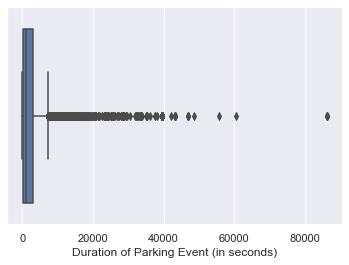

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             953
QUEEN STREET                747
LA TROBE STREET             591
EXHIBITION STREET           586
FRANKLIN STREET             546
COLLINS STREET              516
ELIZABETH STREET            477
RUSSELL STREET              425
BOURKE STREET               404
LT LONSDALE STREET          343
SPRING STREET               295
LT COLLINS STREET           287
KING STREET                 281
FLINDERS LANE               278
ERROL STREET                230
WILLIAM STREET              196
COVENTRY STREET             163
LT BOURKE STREET            161
VICTORIA STREET             159
FLINDERS STREET             157
A'BECKETT STREET            156
SPENCER STREET              148
QUEENSBERRY STREET          124
CAPEL STREET                113
ALBERT STREET               101
THERRY STREET               101
GRANT STREET                100
KAVANAGH STREET              82
O'CONNELL STREET             81
COBDEN STREET                78
DORCAS STREET                76
SWANSTON

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            927
QUEEN STREET           822
WILLIAM STREET         618
QUEENSBERRY STREET     602
RUSSELL STREET         561
SWANSTON STREET        473
SPENCER STREET         463
EXHIBITION STREET      452
LT LONSDALE STREET     444
LONSDALE STREET        351
LT COLLINS STREET      345
VICTORIA STREET        309
COLLINS STREET         300
BOURKE STREET          296
ELIZABETH STREET       261
LT BOURKE STREET       258
FLINDERS LANE          211
LA TROBE STREET        153
THERRY STREET          147
WILLAM STREET          142
FRANKLIN STREET        137
WELLS STREET           123
A'BECKETT STREET       122
DODDS STREET           112
ERROL STREET            92
O'CONNELL STREET        91
SOUTHBANK BOULEVARD     86
STURT STREET            81
FLINDERS STREET         79
HOWARD STREET           77
VICTORIA PARADE         76
KINGS WAY               71
BALSTON STREET          68
PEEL STREET             61
COBDEN STREET           52
PELHAM STREET           52
ALBERT STREET           48
M

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         908
ELIZABETH STREET       846
VICTORIA STREET        779
QUEEN STREET           749
EXHIBITION STREET      545
LONSDALE STREET        478
KING STREET            463
SPRING STREET          455
RUSSELL STREET         407
FLINDERS LANE          379
LT BOURKE STREET       351
COLLINS STREET         345
LT COLLINS STREET      296
SWANSTON STREET        261
BOURKE STREET          258
LA TROBE STREET        252
FLINDERS STREET        211
LT LONSDALE STREET     195
FRANKLIN STREET        147
DODDS STREET           124
ST KILDA ROAD          123
LANSDOWNE STREET       108
LEVESON STREET          92
POWER STREET            92
QUEENSBERRY STREET      87
WELLS STREET            85
CAPEL STREET            69
THERRY STREET           66
A'BECKETT STREET        65
WALSH STREET            58
STURT STREET            49
HAWKE STREET            49
DUDLEY STREET           37
MILES STREET            36
GISBORNE STREET         35
ELM STREET              34
STANLEY STREET          32
E

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5608179,QUEENSBERRY,DUDLEY STREET,KING STREET,WILLIAM STREET,4,7101S,2012-12-03 19:10:30,2012-12-03 19:11:54,84,3P TKT A M-SAT 7:30-20:30,0,614,2739
151998,SPENCER,SPENCER STREET,BOURKE STREET,LT COLLINS STREET,2,1536E,2011-05-10 20:08:04,2011-05-10 20:30:00,1316,2P MTR M-F 18:00-2030,0,1285,764
2002710,THE MAC,SWANSTON STREET,FRANKLIN STREET,LA TROBE STREET,5,4621W,2011-11-25 10:44:20,2011-11-25 10:45:46,86,1P MTR M-F 9:30-16:00,0,1329,3550
4391539,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6644,2012-05-02 09:45:00,2012-05-02 10:11:31,1591,2P SUN 7:30-18:30,0,681,2899
5213472,TITLES,QUEEN STREET,LA TROBE STREET,LT LONSDALE STREET,1,C1266,2012-02-29 17:45:26,2012-02-29 17:47:44,138,1P MTR M-SAT 7:30-19:30,0,1171,736


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
8585511,TITLES,WILLIAM STREET,FRANKLIN STREET,A'BECKETT STREET,5,5345W,2012-06-13 17:42:05,2012-06-13 18:19:26,2241,3P TKT A M-SAT 7:30-20:30,0,1428,5047
6800601,SOUTHBANK,DODDS STREET,SOUTHBANK BOULEVARD,GRANT STREET,2,8338E,2012-04-19 10:01:37,2012-04-19 10:02:59,82,3P TKT A M-F 7:30-18:30,0,591,4623
2510032,BANKS,QUEEN STREET,FLINDERS LANE,FLINDERS STREET,5,975W,2011-09-12 08:50:55,2011-09-12 08:52:42,107,1P MTR M-SAT 7:30-19:30,0,1171,693
898920,TITLES,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,4,3833S,2011-10-26 10:42:47,2011-10-26 11:07:19,1472,1P MTR M-F 9:30-19:30,0,856,2292
7592490,SPENCER,BOURKE STREET,SPENCER STREET,KING STREET,3,2486N,2012-05-14 18:00:55,2012-05-14 19:30:00,5345,1/2P MTR M-SAT 7:30-19:30,1,123,1380


### KNN Classification Model on Predicitive Analytics question 1

In [19]:
#Target field identification
target = parkingdata['In Violation?']
target.head(10)

5608179     0
151998      0
2002710     0
4391539     0
5213472     0
7606655     0
9944558     0
3183941     0
10596686    0
10738362    0
Name: In Violation?, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('In Violation?', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
5608179,0,0,0,0,0,4,84,614,2739,19,19
151998,1,1,1,1,1,2,1316,1285,764,20,20
2002710,2,2,2,2,2,5,86,1329,3550,10,10
4391539,3,3,3,3,3,1,1591,681,2899,9,10
5213472,4,4,4,4,4,1,138,1171,736,17,17
7606655,5,5,5,5,4,3,3571,123,1561,10,11
9944558,6,6,6,6,5,4,4071,16,6443,10,11
3183941,0,7,7,7,6,2,3396,1428,3970,12,13
10596686,7,8,8,8,7,2,673,627,563,8,8
10738362,8,9,9,9,6,2,155,1323,4555,17,17


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 36.4min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'distance'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a = bestModel.best_estimator_.get_params()['algorithm']
best_l = bestModel.best_estimator_.get_params()['leaf_size']
best_p = bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 9
Best weights: distance
Best algorithm: brute
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.9067
1,auto,10,1,1,distance,0.9067
2,auto,10,1,2,uniform,0.9026
3,auto,10,1,2,distance,0.9026
4,auto,10,1,5,uniform,0.9000
5,auto,10,1,5,distance,0.9000
6,auto,10,2,1,uniform,0.9108
7,auto,10,2,1,distance,0.9069
8,auto,10,2,2,uniform,0.9084
9,auto,10,2,2,distance,0.9026


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.8545
Score with 2 selected features: 0.8575
Score with 3 selected features: 0.9035
Score with 4 selected features: 0.906
Score with 5 selected features: 0.922
Score with 6 selected features: 0.922
Score with 7 selected features: 0.923

Indexs of the desired features
[2, 4, 6, 0, 7, 10, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Sign,Duration of Parking Event (in seconds),Area Name,Street ID,Departure Hour,Side Of Street
5608179,0,0,84,0,614,19,4
151998,1,1,1316,1,1285,20,2
2002710,2,2,86,2,1329,10,5
4391539,3,3,1591,3,681,10,1
5213472,4,4,138,4,1171,17,1
7606655,5,4,3571,5,123,11,3
9944558,6,5,4071,6,16,11,4
3183941,7,6,3396,0,1428,13,2
10596686,8,7,673,7,627,8,2
10738362,9,6,155,8,1323,17,2


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1290 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1840 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2490 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3240 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 26.6min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 7
Best weights: distance
Best algorithm: auto
Best leaf_size: 20
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.8992
1,auto,10,1,1,distance,0.8992
2,auto,10,1,2,uniform,0.8922
3,auto,10,1,2,distance,0.8922
4,auto,10,1,5,uniform,0.8936
5,auto,10,1,5,distance,0.8936
6,auto,10,2,1,uniform,0.9074
7,auto,10,2,1,distance,0.8995
8,auto,10,2,2,uniform,0.9022
9,auto,10,2,2,distance,0.8922


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[4165  154]
 [ 282  399]]

[Train/test split] score: 0.91280


In [36]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.91550
[fold 1] score: 0.92350
[fold 2] score: 0.91550
[fold 3] score: 0.92250
[fold 4] score: 0.92900

KNN mean score [5 folds] = 0.9212
